In [ ]:
pip install lightgbm


In [ ]:
import lightgbm as lgb


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier  # LightGBM import
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
heart_data = pd.read_excel("/content/projectdata.xlsx")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
n_cols = {'cp':'Chest Pain Type (CP)',
          'trestbps':'Resting Blood Pressure (trestbps)',
          'chol':'Serum Cholestoral (chol) mg/dl',
          'fbs':  'Fasting Blood Sugar (fbs) > 120 mg/dl',
          'restecg': 'Resting Electrocardiographic Results (restecg)',
          'thalach' : 'Maximum Heart Rate Achieved (thalach)',
          'exang': 'Exercise Induced Angina (exang)',
          'oldpeak' : 'ST depression (oldpeak)' ,
          'slope' : 'Slope of the ST Segment (slope)',
          'ca' : 'Number of Major Vessels (ca)',
          'thal' : 'Thal'}

heart_data.rename(columns=n_cols ,inplace=True)
heart_data.head()

,age,sex,Chest Pain Type (CP),Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,Fasting Blood Sugar (fbs) > 120 mg/dl,Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Number of Major Vessels (ca),Thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.tail()

,age,sex,Chest Pain Type (CP),Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,Fasting Blood Sugar (fbs) > 120 mg/dl,Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Number of Major Vessels (ca),Thal,target
2549,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
2550,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
2551,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
2552,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
2553,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
heart_data.shape

(2554, 14)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             2554 non-null   int64  
 1   sex                                             2554 non-null   int64  
 2   Chest Pain Type (CP)                            2554 non-null   int64  
 3   Resting Blood Pressure (trestbps)               2554 non-null   int64  
 4   Serum Cholestoral (chol) mg/dl                  2554 non-null   int64  
 5   Fasting Blood Sugar (fbs) > 120 mg/dl           2554 non-null   int64  
 6   Resting Electrocardiographic Results (restecg)  2554 non-null   int64  
 7   Maximum Heart Rate Achieved (thalach)           2554 non-null   int64  
 8   Exercise Induced Angina (exang)                 2554 non-null   int64  
 9   ST depression (oldpeak)                  

In [ ]:
heart_data.isnull().sum()

,0
age,0
sex,0
Chest Pain Type (CP),0
Resting Blood Pressure (trestbps),0
Serum Cholestoral (chol) mg/dl,0
Fasting Blood Sugar (fbs) > 120 mg/dl,0
Resting Electrocardiographic Results (restecg),0
Maximum Heart Rate Achieved (thalach),0
Exercise Induced Angina (exang),0
ST depression (oldpeak),0


In [ ]:
heart_data.describe()

,age,sex,Chest Pain Type (CP),Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,Fasting Blood Sugar (fbs) > 120 mg/dl,Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Number of Major Vessels (ca),Thal,target
count,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000
mean,54.324589,0.688332,0.966327,131.444009,245.812060,0.148003,0.530540,149.692247,0.324589,1.044323,1.397024,0.730227,2.313234,0.541112
std,9.095005,0.463266,1.028978,17.403559,51.659017,0.355173,0.525912,22.855239,0.468313,1.158974,0.618116,1.022873,0.613662,0.498405
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


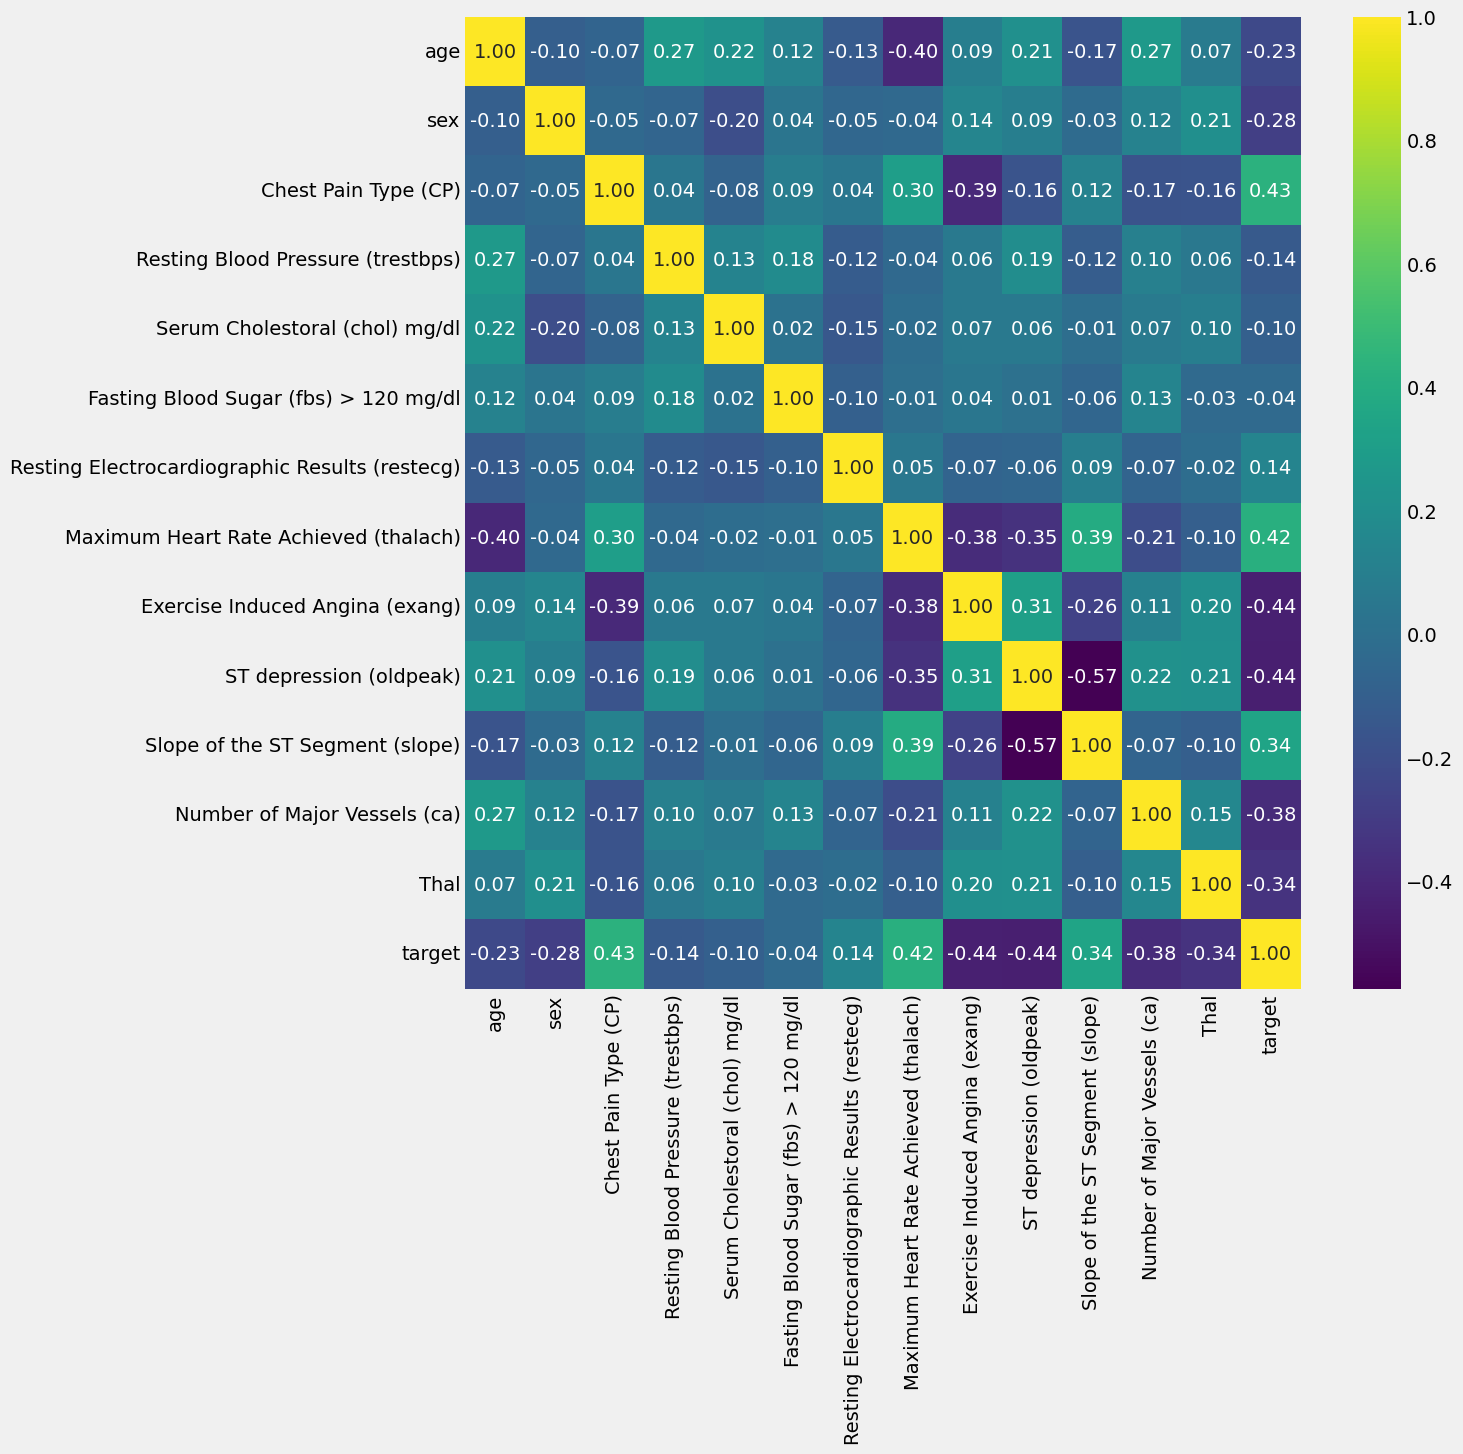

In [ ]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
sns.heatmap(heart_data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [ ]:
heart_data['target'].value_counts()

,count
target,
1,1382
0,1172


#1 --> Defective Heart

#0 --> Healthy Heart

In [ ]:
#Calculate age
minAge=min(heart_data.age)
maxAge=max(heart_data.age)
meanAge=heart_data.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 29 max = 77 mean = 54.32458888018794


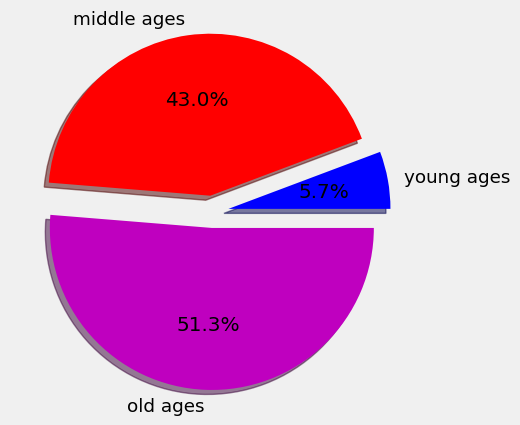

In [ ]:
Young = heart_data[(heart_data.age>=29)&(heart_data.age<40)]
Middle = heart_data[(heart_data.age>=40)&(heart_data.age<55)]
Old = heart_data[(heart_data.age>55)]
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

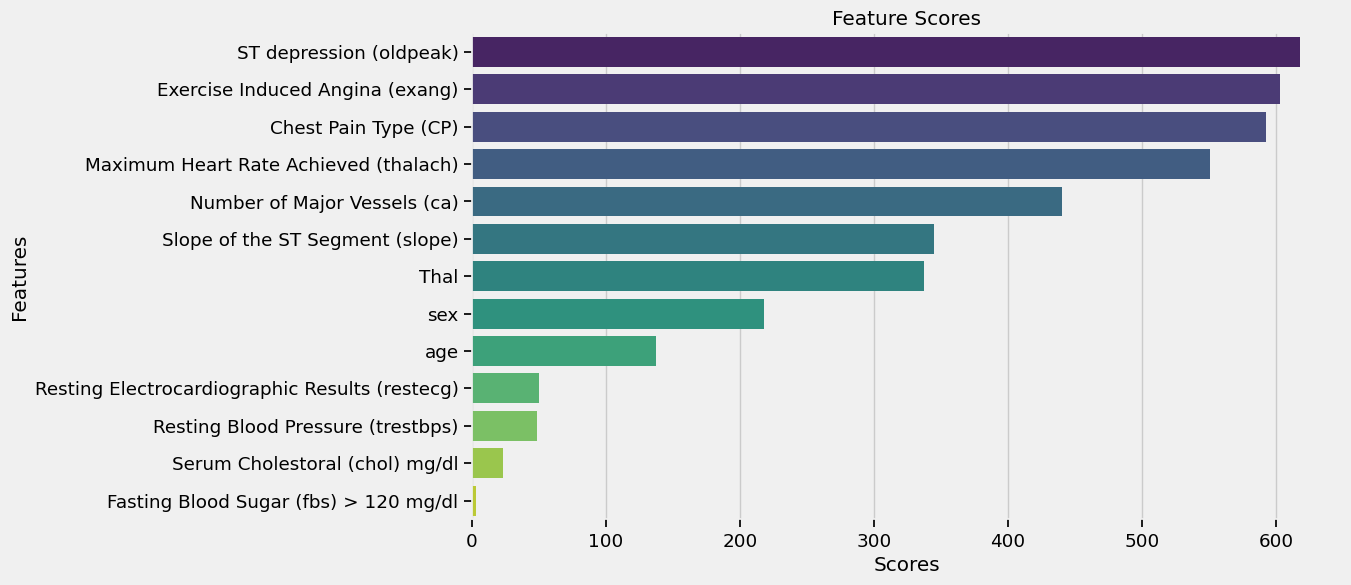

In [ ]:
#There is no outliears
# Feature selection using SelectKBest with ANOVA F-value
X = heart_data.drop(["target"], axis = 1)
y = heart_data["target"]
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

#Here we will be experimenting with 5 algorithms
1.Logistic Regression

2.KNeighborsClassifier

3.DecisionTreeClassifier

4.RandomForestClassifier

5.Light Gradient Boosting Classifier

#Splitting the Features and Target




In [ ]:
X = X.drop(["Fasting Blood Sugar (fbs) > 120 mg/dl","Serum Cholestoral (chol) mg/dl",
            "Resting Electrocardiographic Results (restecg)","Resting Blood Pressure (trestbps)"], axis = 1)

In [ ]:
sc = StandardScaler()
col = ['age',
       'sex',
       'Chest Pain Type (CP)',
       'Thal',
       'Exercise Induced Angina (exang)',
       'Slope of the ST Segment (slope)',
       'Number of Major Vessels (ca)',
       'Maximum Heart Rate Achieved (thalach)',
       'ST depression (oldpeak)']
X[col] = sc.fit_transform(X[col])
X.head()

,age,sex,Chest Pain Type (CP),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Number of Major Vessels (ca),Thal
0,0.954052,0.672895,1.976788,0.013468,-0.693239,1.083651,-2.260576,-0.714038,-2.140414
1,-1.905220,0.672895,1.004759,1.632670,-0.693239,2.119252,-2.260576,-0.714038,-0.510534
2,-1.465332,-1.486117,0.032731,0.976237,-0.693239,0.306950,0.975697,-0.714038,-0.510534
3,0.184248,0.672895,0.032731,1.238810,-0.693239,-0.210851,0.975697,-0.714038,-0.510534
4,0.294220,-1.486117,-0.939298,0.582377,1.442505,-0.383451,0.975697,-0.714038,-0.510534


In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

      age  sex  Chest Pain Type (CP)  Resting Blood Pressure (trestbps)  \
0      63    1                     3                                145   
1      37    1                     2                                130   
2      41    0                     1                                130   
3      56    1                     1                                120   
4      57    0                     0                                120   
...   ...  ...                   ...                                ...   
2549   59    1                     1                                140   
2550   60    1                     0                                125   
2551   47    1                     0                                110   
2552   50    0                     0                                110   
2553   54    1                     0                                120   

      Serum Cholestoral (chol) mg/dl  Fasting Blood Sugar (fbs) > 120 mg/dl  \
0                   

In [ ]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
2549    1
2550    0
2551    0
2552    1
2553    0
Name: target, Length: 2554, dtype: int64


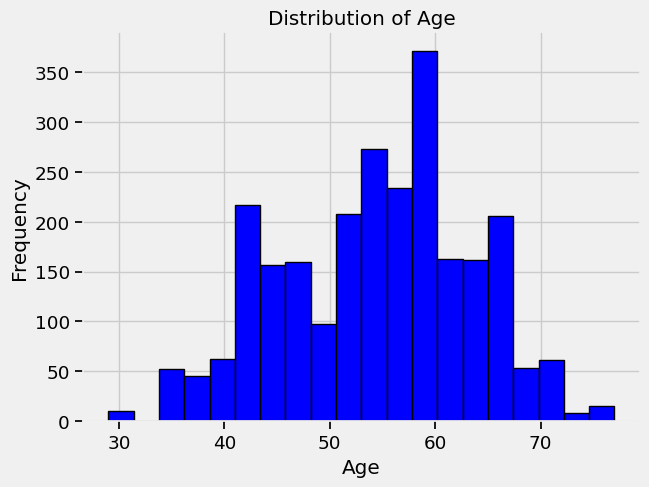

In [ ]:
import matplotlib.pyplot as plt

plt.hist(heart_data['age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2554, 13) (2043, 13) (511, 13)


#Model Training

In [ ]:
model = LogisticRegression()

# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

#LightGBM Classifier

#Training the LightGBM model with Training data

In [ ]:
import lightgbm as lgb

# Create the LightGBM model object
lgbm_model = lgb.LGBMClassifier()

# Now you can fit the model
lgbm_model.fit(X_train, Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1105, number of negative: 938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 2043, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540871 -> initscore=0.163851
[LightGBM] [Info] Start training from score 0.163851


LGBMClassifier()

#Model Evaluation


Accuracy Score

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Logistic Regression - Accuracy on Training data : ', training_data_accuracy)

Logistic Regression - Accuracy on Training data :  0.8614782183064121


#LightGBM accuracy on training data

In [ ]:
train_predictions = lgbm_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)

In [ ]:
print('LightGBM - Accuracy on Training data : ', train_accuracy)

LightGBM - Accuracy on Training data :  1.0


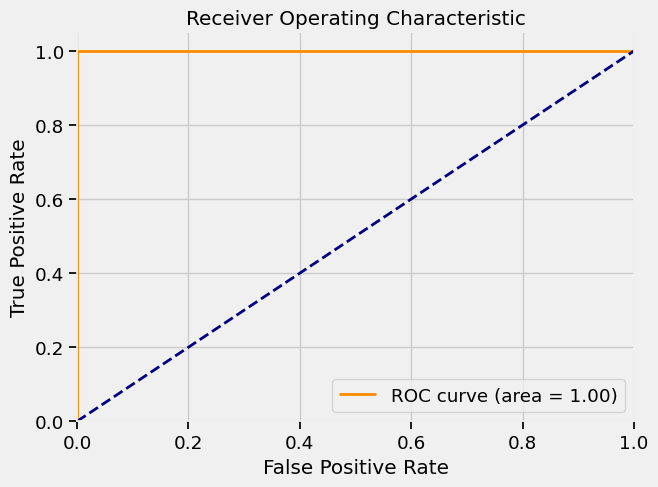

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Y_test, lgbm_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#


# LightGBM accuracy on test data

In [ ]:
test_predictions = lgbm_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)

In [ ]:
print('LightGBM - Accuracy on Test data : ', test_accuracy)

LightGBM - Accuracy on Test data :  1.0


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Initializing and training the LightGBM model
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, Y_train)

# Evaluating the model on the training and test data
train_predictions = lgbm_model.predict(X_train)
test_predictions = lgbm_model.predict(X_test)

train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)

print(f'LightGBM - Training Accuracy: {train_accuracy}')
print(f'LightGBM - Test Accuracy: {test_accuracy}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1105, number of negative: 938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 2043, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540871 -> initscore=0.163851
[LightGBM] [Info] Start training from score 0.163851
LightGBM - Training Accuracy: 1.0
LightGBM - Test Accuracy: 1.0


#KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
clf_knn=KNeighborsClassifier()
parametrs_knn={'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean','manhattan','chebyshev']}
grid_clf_knn=GridSearchCV(clf_knn, parametrs_knn, cv=6, n_jobs=-1)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [ ]:
best_model_knn=grid_clf_knn.best_estimator_
y_pred_knn=best_model_knn.predict(X_test)

In [ ]:
ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
cr_knn = classification_report(y_test, y_pred_knn)
print("classification_report for model " f'{best_model_knn} : \n',cr_knn)

Accuracy score for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) :  1.0
classification_report for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       420

    accuracy                           1.00       767
   macro avg       1.00      1.00      1.00       767
weighted avg       1.00      1.00      1.00       767



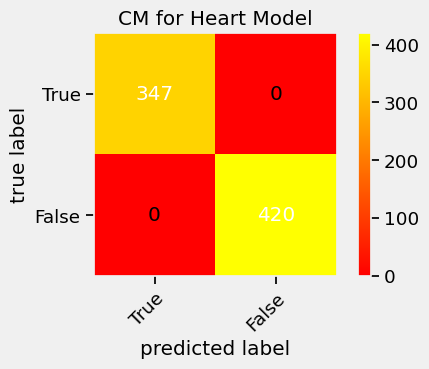

In [ ]:
cm_rnf = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='autumn',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("CM for Heart Model")
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 1382), (1, 1382)]


In [ ]:
y_pred_knn=best_model_knn.predict(X_resampled)

In [ ]:
ac_knn = accuracy_score(y_resampled, y_pred_knn)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
cr_knn = classification_report(y_resampled, y_pred_knn)
print("classification_report for model " f'{best_model_knn} : \n',cr_knn)

Accuracy score for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) :  1.0
classification_report for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1382
           1       1.00      1.00      1.00      1382

    accuracy                           1.00      2764
   macro avg       1.00      1.00      1.00      2764
weighted avg       1.00      1.00      1.00      2764



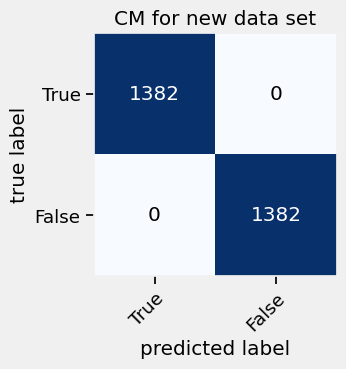

In [ ]:
cm_rnf = confusion_matrix(y_resampled, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf , show_absolute=True, class_names = [True , False ],figsize=(5, 3))
plt.title('CM for new data set')
plt.show()

[LightGBM] [Info] Number of positive: 1099, number of negative: 944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 2043, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537934 -> initscore=0.152030
[LightGBM] [Info] Start training from score 0.152030
Results for SVM:
  Execution Time: 0.11473894119262695 seconds
  Memory Usage: 1.765625 MB
  Accuracy: 0.9706457925636007
  Precision: 0.9706655808273603
  Recall: 0.9706457925636007
  F1 Score: 0.9706519315895746

Results for Logistic Regression:
  Execution Time: 0.45017242431640625 seconds
  Memory Usage: 0.26171875 MB
  Accuracy: 0.8395303326810176
  Precision: 0.8418234217000901
  Recall: 0.8395303326810176
  F1 Score: 0.8380634382426726

R

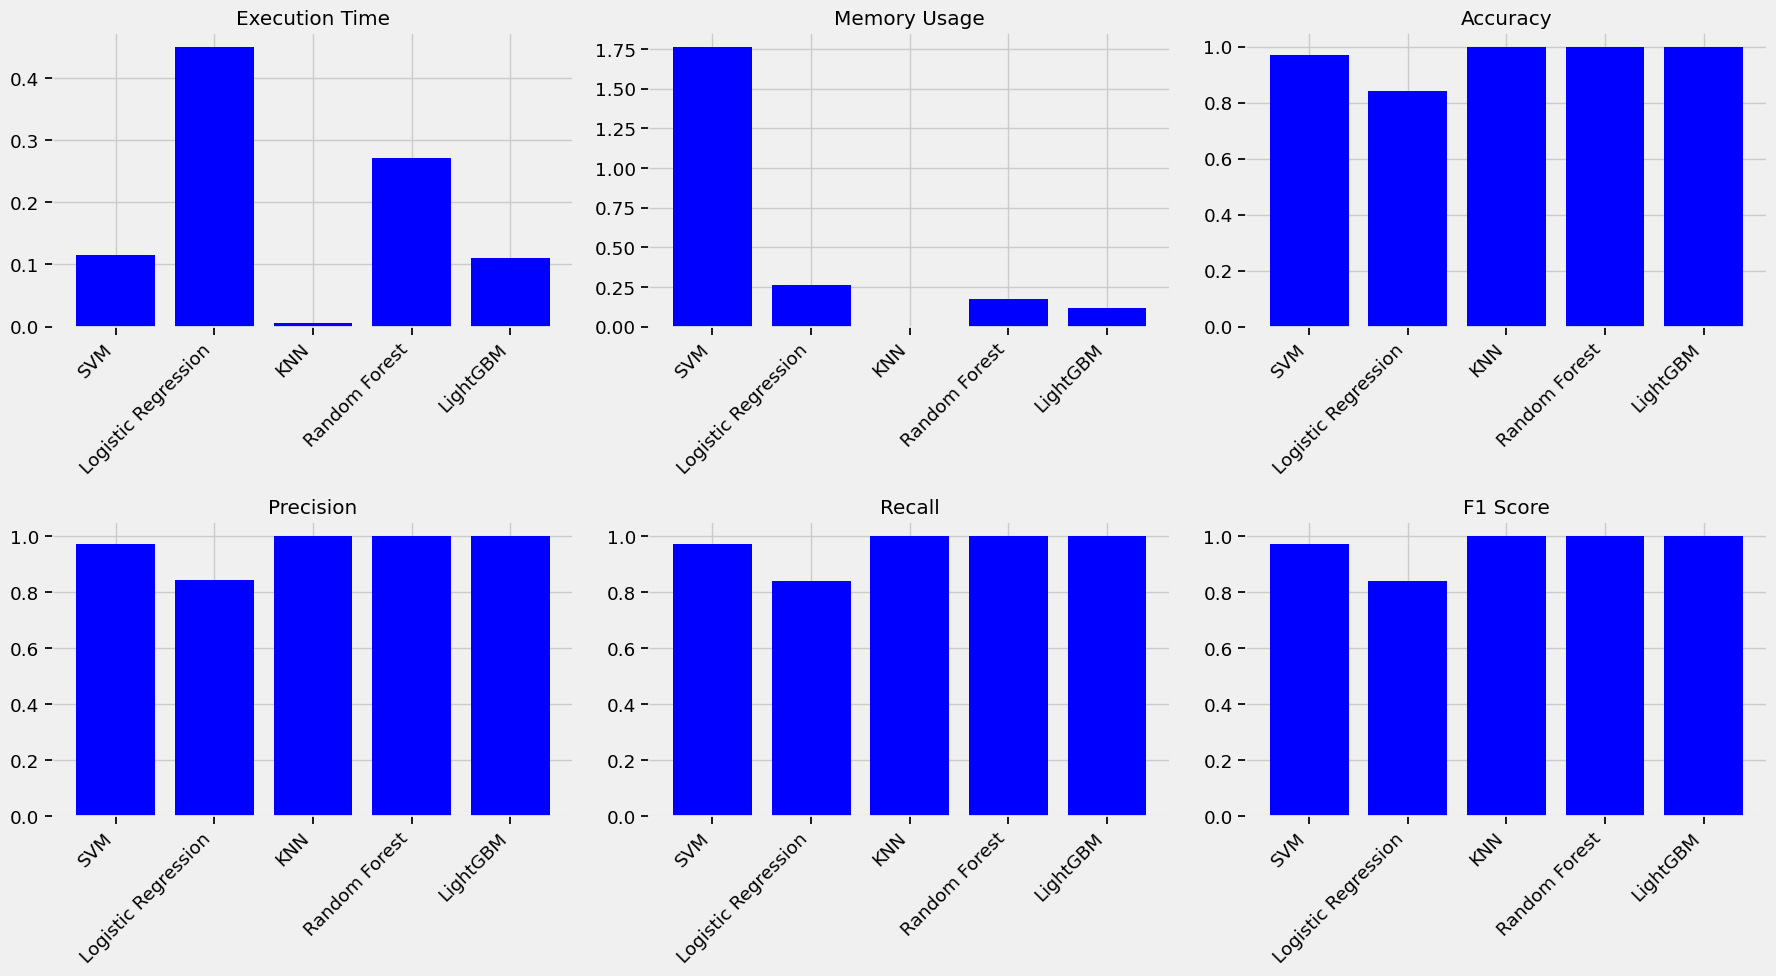

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import psutil
import os
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'projectdata.xlsx'
data = pd.read_excel(file_path)

# Preprocess the data
# (Assuming the target variable is named 'target' and the rest are features)
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (for SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'LightGBM': LGBMClassifier()
}

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    process = psutil.Process(os.getpid())
    before_mem = process.memory_info().rss / 1024 ** 2  # in MB

    model.fit(X_train, y_train)

    after_mem = process.memory_info().rss / 1024 ** 2  # in MB
    execution_time = time.time() - start_time
    mem_usage = after_mem - before_mem

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return {
        'Execution Time': execution_time,
        'Memory Usage': mem_usage,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Evaluate each model and store the results
results = {}
for model_name, model in models.items():
    if model_name in ['SVM', 'KNN']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test

    results[model_name] = evaluate_model(model, X_train_use, X_test_use, y_train, y_test)

# Display the results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Execution Time: {metrics['Execution Time']} seconds")
    print(f"  Memory Usage: {metrics['Memory Usage']} MB")
    print(f"  Accuracy: {metrics['Accuracy']}")
    print(f"  Precision: {metrics['Precision']}")
    print(f"  Recall: {metrics['Recall']}")
    print(f"  F1 Score: {metrics['F1 Score']}")
    print()

# Visualize the results
metrics_names = ['Execution Time', 'Memory Usage', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_data = {metric: [results[model][metric] for model in results] for metric in metrics_names}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, metric in enumerate(metrics_names):
    axes[idx].bar(results.keys(), metrics_data[metric], color='b')
    axes[idx].set_title(metric)
    axes[idx].set_xticklabels(results.keys(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Metric Score

<Figure size 1400x700 with 0 Axes>

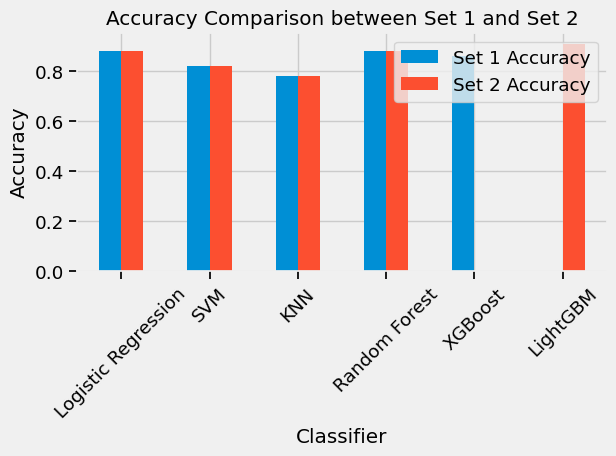

<Figure size 1400x700 with 0 Axes>

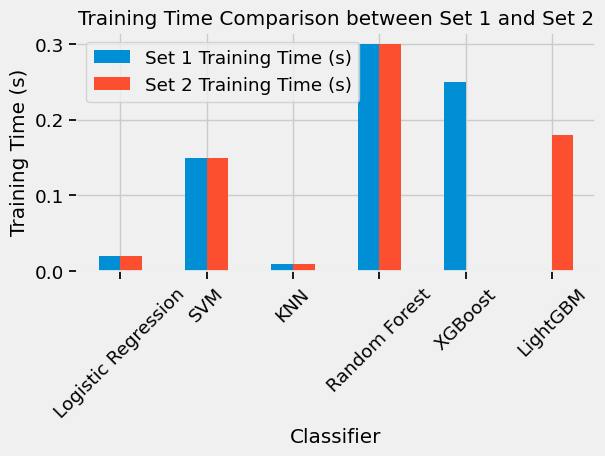

<Figure size 1400x700 with 0 Axes>

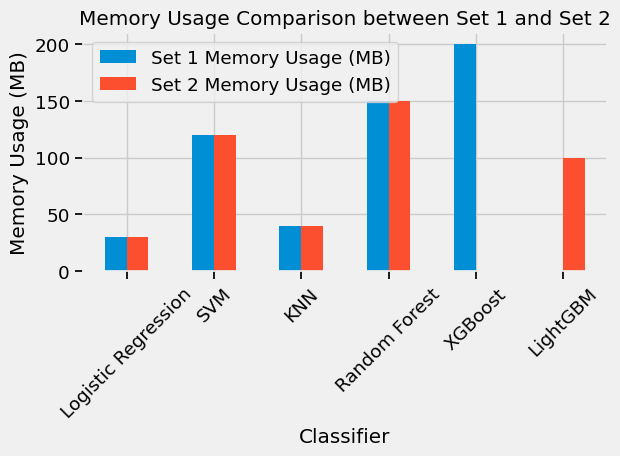

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample results for demonstration purposes
results_accuracy = {
    'Classifier': ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Set 1 Accuracy': [0.88, 0.82, 0.78, 0.88, 0.86, None],
    'Set 2 Accuracy': [0.88, 0.82, 0.78, 0.88, None, 0.91]
}

results_efficiency = {
    'Classifier': ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Set 1 Training Time (s)': [0.02, 0.15, 0.01, 0.30, 0.25, None],
    'Set 2 Training Time (s)': [0.02, 0.15, 0.01, 0.30, None, 0.18],
    'Set 1 Memory Usage (MB)': [30, 120, 40, 150, 200, None],
    'Set 2 Memory Usage (MB)': [30, 120, 40, 150, None, 100]
}

# Convert to DataFrame
accuracy_df = pd.DataFrame(results_accuracy)
efficiency_df = pd.DataFrame(results_efficiency)

# Plotting function
def plot_bars(df, metric, title, ylabel):
    plt.figure(figsize=(14, 7))
    df.plot(kind='bar', x='Classifier', rot=0)
    plt.title(title)
    plt.xlabel('Classifier')
    plt.ylabel(ylabel)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot accuracy comparison
plot_bars(accuracy_df[['Classifier', 'Set 1 Accuracy', 'Set 2 Accuracy']],
          'Accuracy Comparison',
          'Accuracy Comparison between Set 1 and Set 2',
          'Accuracy')

# Plot training time comparison
plot_bars(efficiency_df[['Classifier', 'Set 1 Training Time (s)', 'Set 2 Training Time (s)']],
          'Training Time Comparison',
          'Training Time Comparison between Set 1 and Set 2',
          'Training Time (s)')

# Plot memory usage comparison
plot_bars(efficiency_df[['Classifier', 'Set 1 Memory Usage (MB)', 'Set 2 Memory Usage (MB)']],
          'Memory Usage Comparison',
          'Memory Usage Comparison between Set 1 and Set 2',
          'Memory Usage (MB)')

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score # Import the missing function

randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [ ]:
score.mean()

1.0

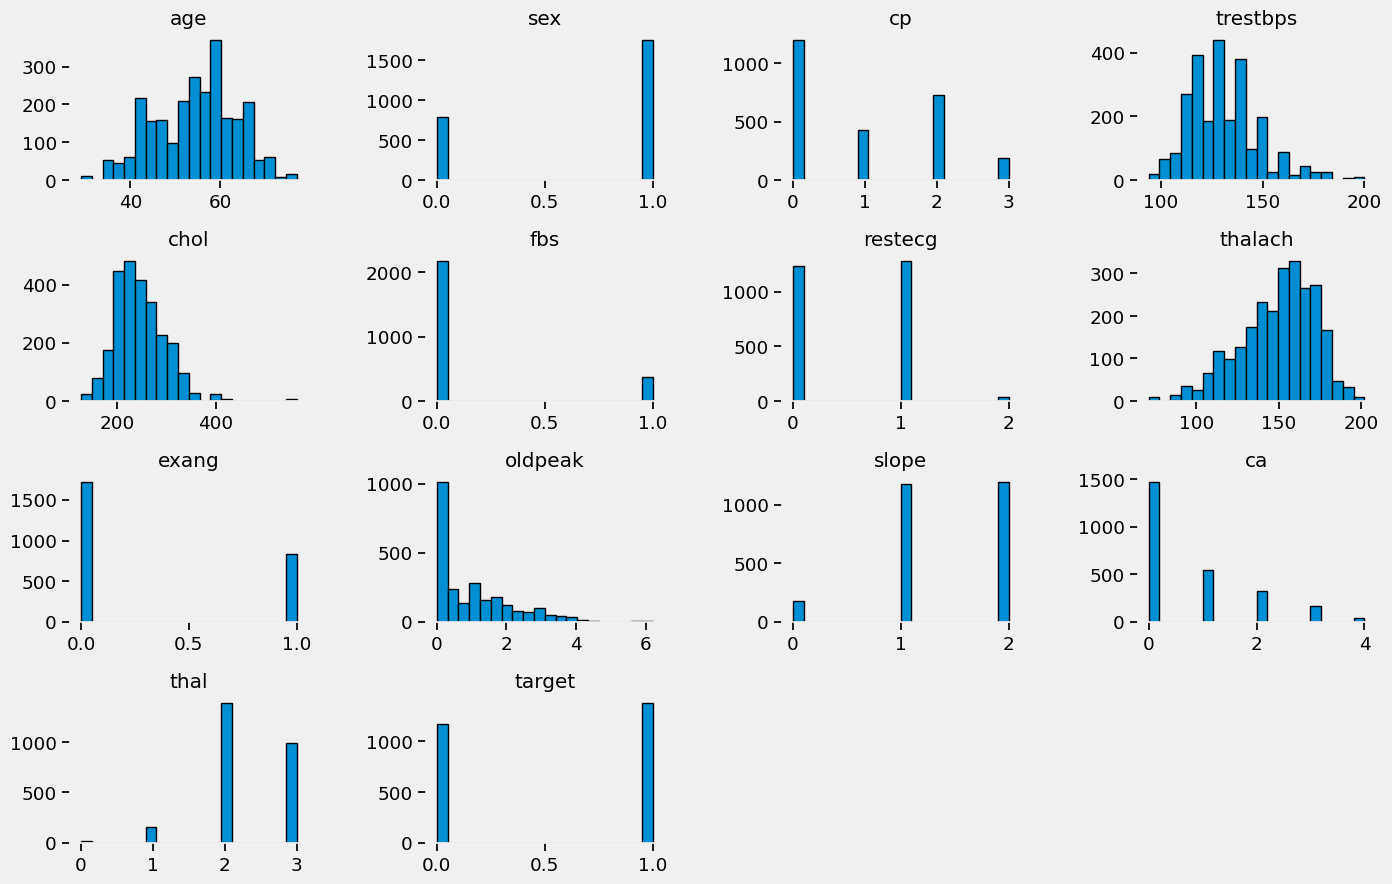

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming heart_data is your DataFrame
heart_data = pd.read_excel('projectdata.xlsx') # Load your dataset here

# Generate histograms for all columns
heart_data.hist(figsize=(15, 10), bins=20, edgecolor='black', grid=False)

# Adjust spacing between plots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()

In [ ]:
heart_data['target'].value_counts()

target
1    1382
0    1172
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

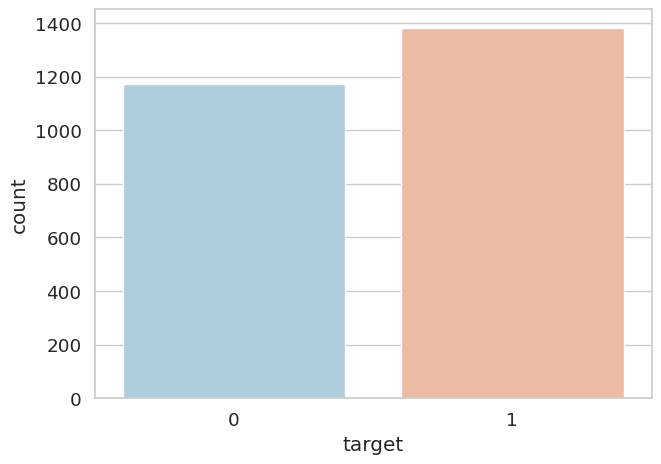

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart_data,palette='RdBu_r')

#1 --> Defective Heart

#0 --> Healthy Heart

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      63    1   3       145   233    1        0      150      0      2.3   
1      37    1   2       130   250    0        1      187      0      3.5   
2      41    0   1       130   204    0        0      172      0      1.4   
3      56    1   1       120   236    0        1      178      0      0.8   
4      57    0   0       120   354    0        1      163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
2549   59    1   1       140   221    0        1      164      1      0.0   
2550   60    1   0       125   258    0        0      141      1      2.8   
2551   47    1   0       110   275    0        0      118      1      1.0   
2552   50    0   0       110   254    0        0      159      0      0.0   
2553   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         0   0     1  
1         0   0     2  
2  

In [ ]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
2549    1
2550    0
2551    0
2552    1
2553    0
Name: target, Length: 2554, dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,Y,cv=10)
    knn_scores.append(score.mean())

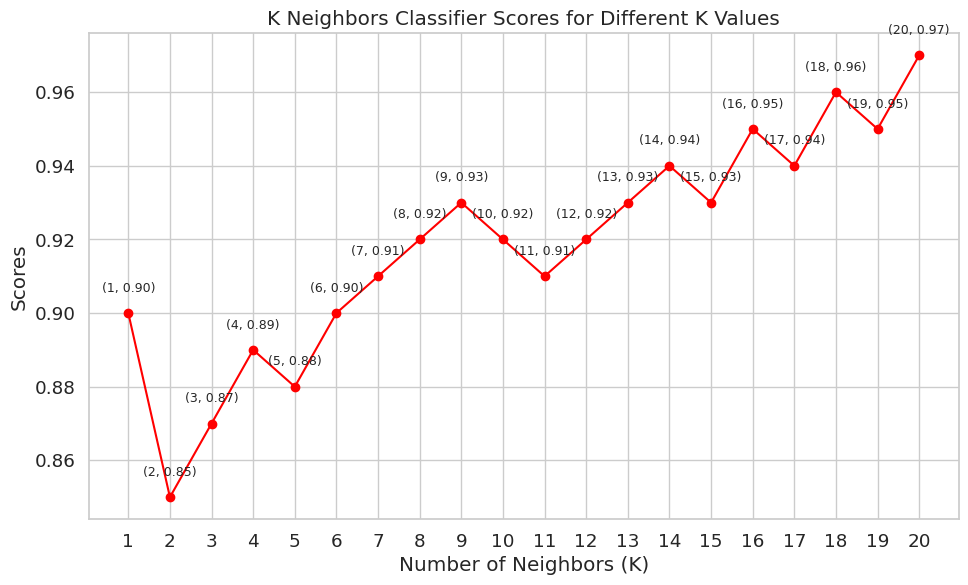

In [ ]:
import matplotlib.pyplot as plt

# Example data
knn_scores = [0.9, 0.85, 0.87, 0.89, 0.88, 0.9, 0.91, 0.92, 0.93, 0.92,
              0.91, 0.92, 0.93, 0.94, 0.93, 0.95, 0.94, 0.96, 0.95, 0.97]

# Increase figure size for better clarity
plt.figure(figsize=(10, 6))

# Plotting the KNN scores
plt.plot([k for k in range(1, 21)], knn_scores, color='red', marker='o')

# Annotating each point with the K value and the score
for i in range(1, 21):
    plt.text(i, knn_scores[i-1] + 0.005, f'({i}, {knn_scores[i-1]:.2f})',
             ha='center', va='bottom', fontsize=9)

# Setting the x-ticks, labels, and title
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier Scores for Different K Values')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
print(X)



      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      63    1   3       145   233    1        0      150      0      2.3   
1      37    1   2       130   250    0        1      187      0      3.5   
2      41    0   1       130   204    0        0      172      0      1.4   
3      56    1   1       120   236    0        1      178      0      0.8   
4      57    0   0       120   354    0        1      163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
2549   59    1   1       140   221    0        1      164      1      0.0   
2550   60    1   0       125   258    0        0      141      1      2.8   
2551   47    1   0       110   275    0        0      118      1      1.0   
2552   50    0   0       110   254    0        0      159      0      0.0   
2553   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         0   0     1  
1         0   0     2  
2  

In [ ]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
2549    1
2550    0
2551    0
2552    1
2553    0
Name: target, Length: 2554, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2554, 13) (2043, 13) (511, 13)


#Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

#LightGBM Classifier


# training the LightGBM model with Training data

In [ ]:
import lightgbm as lgb

# Initialize the LightGBM model
lgbm_model = lgb.LGBMClassifier()

# Train the model
lgbm_model.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 1105, number of negative: 938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 2043, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540871 -> initscore=0.163851
[LightGBM] [Info] Start training from score 0.163851


LGBMClassifier()

#Model Evaluation

#Accuracy Score

 Logistic Regression accuracy on training data

Logistic Regression accuracy on test data

#Building a Predictive System with LightGBM

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [ ]:
prediction = lgbm_model.predict(input_data_reshaped)
print(prediction)

[0]


In [ ]:
if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

The Person does not have a Heart Disease
